### TFA: time-frequency analysis

In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('..'))
from scipy.io import loadmat
from pathlib import Path
import matplotlib.patches as patches
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
# the following import is required for matplotlib < 3.2:
from mpl_toolkits.mplot3d import Axes3D  # noqa
from scipy import stats
from scipy.stats import ttest_ind, ttest_rel, mannwhitneyu
import mne
import eeg_analysis.funcs4eeg as fe
import pickle
import re
import imp
import ast
import behavior.func4behav as fb

imp.reload(fe)
imp.reload(fb)

<module 'behavior.func4behav' from 'c:\\Users\\Tianyi Zheng\\OneDrive - neuron.t.u-tokyo.ac.jp\\Documents\\zheng\\mywork\\attention_tES\\tes-attention\\processing\\behavior\\func4behav.py'>

In [2]:
# bands = [[4, 7], [8, 12], [12.5, 30], [30, 60], [60, 100]]
# band_names = ['theta', 'alpha', 'beta', 'gamma', 'high gamma']

case = "exo valid"
watch = "11 stim"
tmin = -0.1
tmax = 0.5
lofreq = 1
hifreq = 100

with open("../../../docs/tmp_data/"+case+"_"+watch+"_tfa_list.pkl", "rb") as f:
    mean_list = pickle.load(f)

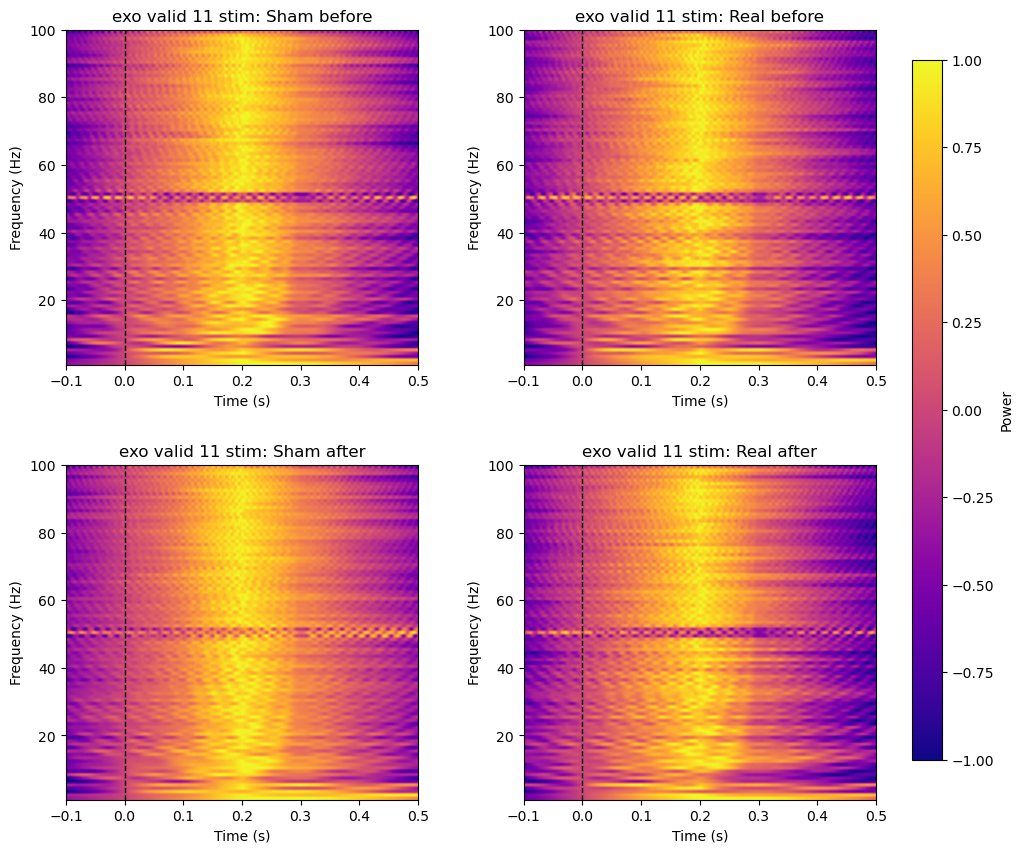

In [13]:
times = np.linspace(tmin, tmax, num=mean_list[0].shape[2])

channels = fe.pick_cortex('all')
picks = list(channels.keys())
pick_channels = [channels[key] for key in picks]

# Re-order the title list
title_list = [case+' '+watch+': Sham before', case+' '+watch+': Sham after', case+' '+watch+': Real before', case+' '+watch+': Real after']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Define the desired order of the plots
plot_order = [(0, 0), (1, 0), (0, 1), (1, 1)]

for i, (row, col) in enumerate(plot_order):
    ax = axes[row, col]
    pick_channels_adj = [channel-1 for channel in pick_channels]
    picked_data = mean_list[i][pick_channels_adj]
    tfmap = np.mean(picked_data, axis=0)
    # tfmap = fe.normalize_tfmap(tfmap, times, axis="freq")
    # Plotting the Time-Frequency Map for each subplot
    im = ax.imshow(tfmap, aspect='auto', origin='lower', extent=[tmin, tmax, lofreq, hifreq], cmap='plasma')
    ax.axvline(0, color='black', linestyle='--', linewidth=1)
    ax.set_ylabel('Frequency (Hz)')
    ax.set_xlabel('Time (s)')
    ax.set_ylim(1, 100)
    # ax.set_yticks([1, 4, 8, 12, 30, 50, 60, 100])
    ax.set_title(title_list[i])

# Adjust the space between subplots and add a colorbar
fig.subplots_adjust(right=0.8, wspace=0.3, hspace=0.3)
cbar_ax = fig.add_axes([0.83, 0.15, 0.025, 0.7])  # [left, bottom, width, height]
fig.colorbar(im, cax=cbar_ax, label='Power')

plt.show()


### Subtract before-after